# Visualization

In [1]:
%load_ext autoreload
%autoreload 2 

import helpers
import config

import torch
import torch.nn as nn
import numpy as np

from models.BasicNet import BasicNet
from train import train_basic
from predict import predict_basic

from models.CNN import CNN
from models.FCN import FCN 

from models.SiameseNet import SiameseNet
from train import train_siamese
from predict import predict_siamese

import torch.utils.data as data
import matplotlib.pyplot as plt
from datasets import PairDataset
from torchsummary import summary

In [2]:
rounds = 10 

## Load data

In [3]:
pairs = helpers.generate_pair_sets(config.NB_SAMPLES)

train_dataset = PairDataset(pairs[0], pairs[1], pairs[2])
train_dataloader = data.DataLoader(dataset=train_dataset, batch_size= config.TRAIN_BATCH_SIZE, shuffle=True)

test_dataset = PairDataset(pairs[3], pairs[4], pairs[5])
test_dataloader = data.DataLoader(dataset=test_dataset, batch_size=config.TEST_BATCH_SIZE, shuffle=True)

## Plot

### Basic Net

In [4]:
summary(BasicNet(), (1 ,2, 14, 14)) 

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 512]         201,216
            Linear-2                    [-1, 1]             513
Total params: 201,729
Trainable params: 201,729
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.77
Estimated Total Size (MB): 0.77
----------------------------------------------------------------


In [5]:
round_results = [] #3D
    
for i in range(rounds):
    print("Round {0}".format(i))

    results = [] #training_losses, training_acc, test_losses, test_acc
    
    model = BasicNet()
    
    training_losses, training_acc, test_losses, test_acc = train_basic(model, train_dataloader, test_dataloader, epochs = config.EPOCHS,  learning_rate= 0.00001)

    results.append([training_losses, training_acc, test_losses, test_acc])
              
    print("With {0} batch size and {1} epochs and {2} learning rate we get :".format(config.TRAIN_BATCH_SIZE, config.EPOCHS, config.LEARNING_RATE))
    
    final_test_loss, final_test_loss_acc = predict_basic(model, test_dataloader)
    print("On the test set we obtain a loss of {:.2f} and an accuracy of {:.2f}".format(final_test_loss,final_test_loss_acc))
      
    round_results.append(results)

Round 0
At epoch 1 the loss is 4.781046049894371
At epoch 1 the accuracy is 0.655
epoch 1/20
The test loss is 4.04232931137085
The test accuracy is 0.688
At epoch 2 the loss is 3.524946584801768
At epoch 2 the accuracy is 0.704
epoch 2/20
The test loss is 3.263725757598877
The test accuracy is 0.685
At epoch 3 the loss is 2.873331049500909
At epoch 3 the accuracy is 0.725
epoch 3/20
The test loss is 2.9460840225219727
The test accuracy is 0.692
At epoch 4 the loss is 2.353714794152859
At epoch 4 the accuracy is 0.737
epoch 4/20
The test loss is 2.6083686351776123
The test accuracy is 0.704
At epoch 5 the loss is 2.039886132039046
At epoch 5 the accuracy is 0.744
epoch 5/20
The test loss is 2.3866124153137207
The test accuracy is 0.71
At epoch 6 the loss is 1.7223257495434767
At epoch 6 the accuracy is 0.748
epoch 6/20
The test loss is 2.189638376235962
The test accuracy is 0.703
At epoch 7 the loss is 1.514868930430473
At epoch 7 the accuracy is 0.778
epoch 7/20
The test loss is 2.0442

At epoch 14 the loss is 1.125676322225372
At epoch 14 the accuracy is 0.78
epoch 14/20
The test loss is 1.9554221630096436
The test accuracy is 0.712
At epoch 15 the loss is 1.0937205145655389
At epoch 15 the accuracy is 0.788
epoch 15/20
The test loss is 1.9243581295013428
The test accuracy is 0.705
At epoch 16 the loss is 1.0312021366092392
At epoch 16 the accuracy is 0.793
epoch 16/20
The test loss is 1.8811923265457153
The test accuracy is 0.715
At epoch 17 the loss is 0.9973647798430102
At epoch 17 the accuracy is 0.791
epoch 17/20
The test loss is 1.8800252676010132
The test accuracy is 0.708
At epoch 18 the loss is 0.9621259821339482
At epoch 18 the accuracy is 0.797
epoch 18/20
The test loss is 1.8306294679641724
The test accuracy is 0.712
At epoch 19 the loss is 0.9486443568631785
At epoch 19 the accuracy is 0.803
epoch 19/20
The test loss is 1.8490264415740967
The test accuracy is 0.706
At epoch 20 the loss is 0.9188931683551641
At epoch 20 the accuracy is 0.802
epoch 20/20
T

At epoch 5 the loss is 2.2463521964261317
At epoch 5 the accuracy is 0.729
epoch 5/20
The test loss is 2.847665548324585
The test accuracy is 0.697
At epoch 6 the loss is 1.9123023275138484
At epoch 6 the accuracy is 0.738
epoch 6/20
The test loss is 2.577782392501831
The test accuracy is 0.697
At epoch 7 the loss is 1.6769250363121706
At epoch 7 the accuracy is 0.765
epoch 7/20
The test loss is 2.4041779041290283
The test accuracy is 0.704
At epoch 8 the loss is 1.5197181600759924
At epoch 8 the accuracy is 0.771
epoch 8/20
The test loss is 2.293205499649048
The test accuracy is 0.704
At epoch 9 the loss is 1.3902295518089067
At epoch 9 the accuracy is 0.771
epoch 9/20
The test loss is 2.252840280532837
The test accuracy is 0.695
At epoch 10 the loss is 1.2937943053011347
At epoch 10 the accuracy is 0.779
epoch 10/20
The test loss is 2.1378397941589355
The test accuracy is 0.704
At epoch 11 the loss is 1.2147286945722409
At epoch 11 the accuracy is 0.776
epoch 11/20
The test loss is 2

At epoch 17 the loss is 0.961683727759164
At epoch 17 the accuracy is 0.796
epoch 17/20
The test loss is 1.7970514297485352
The test accuracy is 0.715
At epoch 18 the loss is 0.9391678687867875
At epoch 18 the accuracy is 0.8
epoch 18/20
The test loss is 1.7755948305130005
The test accuracy is 0.714
At epoch 19 the loss is 0.8909139430907362
At epoch 19 the accuracy is 0.79
epoch 19/20
The test loss is 1.7391587495803833
The test accuracy is 0.713
At epoch 20 the loss is 0.8615020461270597
At epoch 20 the accuracy is 0.791
epoch 20/20
The test loss is 1.7320071458816528
The test accuracy is 0.719
With 5 batch size and 20 epochs and 0.001 learning rate we get :
The test loss is 1.7320061922073364
The test accuracy is 0.719
On the test set we obtain a loss of 1.73 and an accuracy of 0.72
Round 8
At epoch 1 the loss is 6.837549264382106
At epoch 1 the accuracy is 0.53
epoch 1/20
The test loss is 4.74354362487793
The test accuracy is 0.61
At epoch 2 the loss is 4.217992394753116
At epoch 2

In [6]:
means = np.array(round_results).mean(axis= 0).reshape((4,20))
std  = np.array(round_results).std(axis = 0).reshape((4,20))

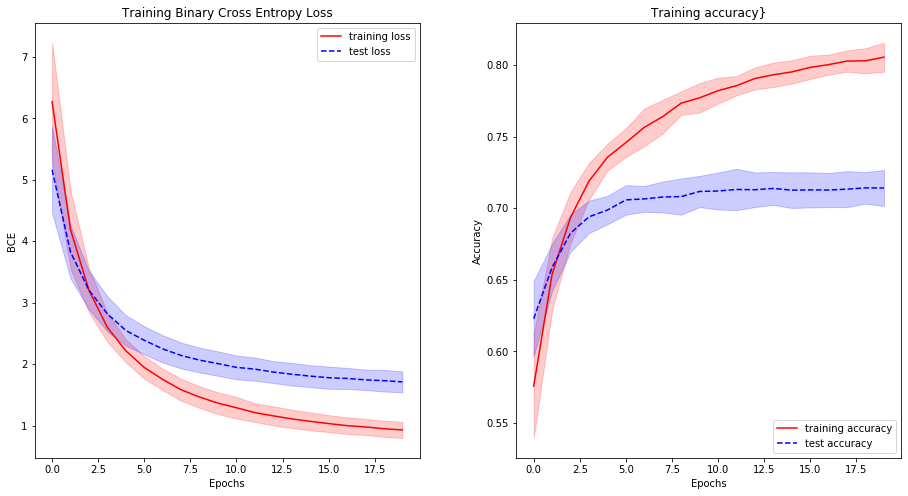

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize= (14,8))

ax1.plot(means[0], color = 'r', label = 'training loss')
ax1.plot(means[2], color = 'b',  linestyle='dashed', label = 'test loss')
        
ax1.fill_between(range(len(means[0])), means[0] - std[0], means[0] + std[0], alpha = 0.2, color = 'r')
ax1.fill_between(range(len(means[2])), means[2] - std[2], means[2] + std[2], alpha = 0.2, color = 'b')

ax2.plot(means[1], color = 'r', label = 'training accuracy')
ax2.plot(means[3], color = 'b', linestyle='dashed', label = 'test accuracy')

ax2.fill_between(range(len(means[1])), means[1]- std[1], means[1]+ std[1], alpha = 0.2, color = 'r')
ax2.fill_between(range(len(means[3])), means[3]- std[3], means[3]+ std[3], alpha = 0.2, color = 'b')

ax1.set_title('Training Binary Cross Entropy Loss')
ax1.set_xlabel("Epochs")
ax1.set_ylabel("BCE")

ax2.set_title('Training accuracy}')
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Accuracy")

ax1.legend(loc = 'upper right')
ax2.legend(loc = 'lower right')
plt.subplots_adjust(left=0.07, right=0.93, wspace=0.25, hspace=0.35)
plt.show()

### Siamese Net

We want to assess the difference w/o aux loss and weight sharing for each subnet configuration

In [8]:
configuration = [
    (weight_sharing, aux_loss)
    
    for weight_sharing in [False,True]
    for aux_loss in [False,True]
]
configuration

[(False, False), (False, True), (True, False), (True, True)]

In [9]:
def compute_results(subnet_type): 

    round_results = []

    for i in range(rounds):
        results = [] #training_losses, training_acc, test_losses, test_acc
        
        for weight_sharing, aux_loss in configuration:
            if(subnet_type =='FCN'):
                subnet1 = FCN()
                subnet2 = FCN()
            else:
                subnet1 = CNN()
                subnet2 = CNN()
            
            print('Model for weight_sharing = {0} and aux loss = {1} on round {2} with subnet {3}'.format(weight_sharing, aux_loss, 
                                                                                                          i,subnet_type))
            
            if(weight_sharing):
                model = SiameseNet(subnet1)
            else: 
                model = SiameseNet(subnet1,subnet2)

            training_losses, training_acc, _, _, test_losses, test_acc, _, _ = train_siamese(
                    model = model, dataloader = train_dataloader, test_dataloader = test_dataloader, aux_loss = aux_loss)        

            final_test_loss, final_test_loss_acc = test_losses[-1], test_acc[-1]
            print("In epoch 20, on the test set we obtain a loss of {:.2f} and an accuracy of {:.2f}".format(final_test_loss,final_test_loss_acc))
            results.append([training_losses, training_acc, test_losses, test_acc])

        round_results.append(results)

    return round_results

In [10]:
def plots_results(round_results, subnet_type):
    
    colors = ['b', 'g', 'r', 'm']

    fig, (ax1, ax2) = plt.subplots(1, 2,figsize= (14,8))

    means = np.array(round_results).mean(axis= 0)
    std  = np.array(round_results).std(axis = 0)
    dict_word = {False :'without', True : 'with'}
    for i, (r,s,p) in enumerate( zip(means,std,configuration) ):

        ax1.plot(r[0], color = colors[i], label = 'training loss {0} WS and {1} AL'.format(dict_word[p[0]], dict_word[p[1]]))
        ax1.plot(r[2], color = colors[i],  linestyle='dashed', label = 'test loss {0} WS and {1} AL'.format(dict_word[p[0]], dict_word[p[1]]))

        ax1.fill_between(range(len(r[0])), r[0] - s[0], r[0]+ s[0], alpha = 0.2, color = colors[i])
        ax1.fill_between(range(len(r[2])), r[2]- s[2], r[2]+ s[2], alpha = 0.2, color = colors[i])

        ax2.plot(r[1], color = colors[i], label = 'training accuracy {0} WS and {1} AL'.format(dict_word[p[0]], dict_word[p[1]]))
        ax2.plot(r[3], color = colors[i], linestyle='dashed', label = 'test accuracy {0} WS and {1} AL'.format(dict_word[p[0]], dict_word[p[1]]))

        ax2.fill_between(range(len(r[1])), r[1]- s[1], r[1]+ s[1], alpha = 0.2, color = colors[i])
        ax2.fill_between(range(len(r[3])), r[3]- s[3], r[3]+ s[3], alpha = 0.2, color = colors[i])

    ax1.set_title('Training Binary Cross Entropy with {0} subnets'.format(subnet_type))
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("BCE")

    ax2.set_title('Training accuracy with {0} subnets'.format(subnet_type))
    ax2.set_xlabel("Epochs")
    ax2.set_ylabel("Accuracy")

    ax1.legend(loc = 'upper right')
    ax2.legend(loc = 'lower right')
    plt.subplots_adjust(left=0.07, right=0.93, wspace=0.25, hspace=0.35)
    plt.show()

#### Subnets : FCN 

In [11]:
FCN()

FCN(
  (hiddens): ModuleList(
    (0): Sequential(
      (0): Linear(in_features=196, out_features=64, bias=True)
      (1): LeakyReLU(negative_slope=0.01)
      (2): Dropout(p=0.2)
    )
  )
  (output): Linear(in_features=64, out_features=10, bias=True)
)

In [12]:
summary(FCN(), (1 ,1, 14, 14)) 

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 64]          12,608
         LeakyReLU-2                   [-1, 64]               0
           Dropout-3                   [-1, 64]               0
            Linear-4                   [-1, 10]             650
Total params: 13,258
Trainable params: 13,258
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.05
Estimated Total Size (MB): 0.05
----------------------------------------------------------------


In [16]:
round_results_FCN = compute_results('FCN')

Model for weight_sharing = False and aux loss = False on round 0 with subnet FCN
At epoch 1 the training loss is 0.7562432689964771
At epoch 1 the training accuracy is 0.618
epoch 1/20
The test loss is 0.6041420102119446
The test accuracy is 0.687
At epoch 2 the training loss is 0.515636690557003
At epoch 2 the training accuracy is 0.769
epoch 2/20
The test loss is 0.5133916139602661
The test accuracy is 0.738
At epoch 3 the training loss is 0.4262431032769382
At epoch 3 the training accuracy is 0.801
epoch 3/20
The test loss is 0.46028849482536316
The test accuracy is 0.777
At epoch 4 the training loss is 0.38642688633874056
At epoch 4 the training accuracy is 0.83
epoch 4/20
The test loss is 0.4760730266571045
The test accuracy is 0.774
At epoch 5 the training loss is 0.2995146811264567
At epoch 5 the training accuracy is 0.869
epoch 5/20
The test loss is 0.4744085967540741
The test accuracy is 0.793
At epoch 6 the training loss is 0.27362664525862784
At epoch 6 the training accuracy

At epoch 8 the training loss is 0.19198628636979265
At epoch 8 the training accuracy is 0.921
epoch 8/20
The test loss is 0.45523127913475037
The test accuracy is 0.818
At epoch 9 the training loss is 0.17656623927896362
At epoch 9 the training accuracy is 0.93
epoch 9/20
The test loss is 0.4353906512260437
The test accuracy is 0.839
At epoch 10 the training loss is 0.14092220849689055
At epoch 10 the training accuracy is 0.938
epoch 10/20
The test loss is 0.4364803433418274
The test accuracy is 0.847
At epoch 11 the training loss is 0.12382104024873115
At epoch 11 the training accuracy is 0.952
epoch 11/20
The test loss is 0.4745217263698578
The test accuracy is 0.853
At epoch 12 the training loss is 0.09788769246943957
At epoch 12 the training accuracy is 0.966
epoch 12/20
The test loss is 0.509425938129425
The test accuracy is 0.843
At epoch 13 the training loss is 0.10912615243967594
At epoch 13 the training accuracy is 0.968
epoch 13/20
The test loss is 0.5130977630615234
The test

At epoch 15 the training loss is 0.04585647413256993
At epoch 15 the training accuracy is 0.986
epoch 15/20
The test loss is 0.6646732687950134
The test accuracy is 0.83
At epoch 16 the training loss is 0.03260244590398088
At epoch 16 the training accuracy is 0.99
epoch 16/20
The test loss is 0.7572149038314819
The test accuracy is 0.827
At epoch 17 the training loss is 0.032791164892564666
At epoch 17 the training accuracy is 0.989
epoch 17/20
The test loss is 0.8668496012687683
The test accuracy is 0.836
At epoch 18 the training loss is 0.025648226113493138
At epoch 18 the training accuracy is 0.991
epoch 18/20
The test loss is 0.8429094552993774
The test accuracy is 0.834
At epoch 19 the training loss is 0.04583202744094763
At epoch 19 the training accuracy is 0.986
epoch 19/20
The test loss is 0.8178769946098328
The test accuracy is 0.835
At epoch 20 the training loss is 0.028924006240941935
At epoch 20 the training accuracy is 0.991
epoch 20/20
The test loss is 0.8389196991920471


At epoch 1 the training loss is 2.5059766244888304
At epoch 1 the training accuracy is 0.642
epoch 1/20
The test loss is 0.7089137434959412
The test accuracy is 0.767
At epoch 2 the training loss is 0.7571190839260816
At epoch 2 the training accuracy is 0.725
epoch 2/20
The test loss is 0.5385468006134033
The test accuracy is 0.801
At epoch 3 the training loss is 0.5908721765503288
At epoch 3 the training accuracy is 0.766
epoch 3/20
The test loss is 0.4863450229167938
The test accuracy is 0.812
At epoch 4 the training loss is 0.47377099145203827
At epoch 4 the training accuracy is 0.815
epoch 4/20
The test loss is 0.465215802192688
The test accuracy is 0.819
At epoch 5 the training loss is 0.40770653513260185
At epoch 5 the training accuracy is 0.852
epoch 5/20
The test loss is 0.39690279960632324
The test accuracy is 0.839
At epoch 6 the training loss is 0.36700465325266124
At epoch 6 the training accuracy is 0.856
epoch 6/20
The test loss is 0.392889142036438
The test accuracy is 0.

At epoch 8 the training loss is 0.2822833589185029
At epoch 8 the training accuracy is 0.891
epoch 8/20
The test loss is 0.526211142539978
The test accuracy is 0.85
At epoch 9 the training loss is 0.21769953843206166
At epoch 9 the training accuracy is 0.916
epoch 9/20
The test loss is 0.5285712480545044
The test accuracy is 0.858
At epoch 10 the training loss is 0.220600384674035
At epoch 10 the training accuracy is 0.915
epoch 10/20
The test loss is 0.580045223236084
The test accuracy is 0.839
At epoch 11 the training loss is 0.19027087339723947
At epoch 11 the training accuracy is 0.919
epoch 11/20
The test loss is 0.5656174421310425
The test accuracy is 0.851
At epoch 12 the training loss is 0.1760944695258513
At epoch 12 the training accuracy is 0.934
epoch 12/20
The test loss is 0.5716789960861206
The test accuracy is 0.85
At epoch 13 the training loss is 0.1577817475888878
At epoch 13 the training accuracy is 0.942
epoch 13/20
The test loss is 0.5510016679763794
The test accurac

At epoch 15 the training loss is 0.1696799363626633
At epoch 15 the training accuracy is 0.933
epoch 15/20
The test loss is 0.35160598158836365
The test accuracy is 0.897
At epoch 16 the training loss is 0.15129136438888963
At epoch 16 the training accuracy is 0.945
epoch 16/20
The test loss is 0.35615065693855286
The test accuracy is 0.9
At epoch 17 the training loss is 0.1449931776338781
At epoch 17 the training accuracy is 0.944
epoch 17/20
The test loss is 0.33269578218460083
The test accuracy is 0.898
At epoch 18 the training loss is 0.13973845103755594
At epoch 18 the training accuracy is 0.951
epoch 18/20
The test loss is 0.3407728672027588
The test accuracy is 0.899
At epoch 19 the training loss is 0.12204904482699931
At epoch 19 the training accuracy is 0.956
epoch 19/20
The test loss is 0.35459965467453003
The test accuracy is 0.899
At epoch 20 the training loss is 0.11417149523156694
At epoch 20 the training accuracy is 0.967
epoch 20/20
The test loss is 0.3520413935184479
T

At epoch 1 the training loss is 0.6884643590822815
At epoch 1 the training accuracy is 0.658
epoch 1/20
The test loss is 0.45326024293899536
The test accuracy is 0.767
At epoch 2 the training loss is 0.4568231726624072
At epoch 2 the training accuracy is 0.783
epoch 2/20
The test loss is 0.40550556778907776
The test accuracy is 0.812
At epoch 3 the training loss is 0.39805845346301794
At epoch 3 the training accuracy is 0.815
epoch 3/20
The test loss is 0.4154537618160248
The test accuracy is 0.812
At epoch 4 the training loss is 0.33555465331766754
At epoch 4 the training accuracy is 0.841
epoch 4/20
The test loss is 0.38881272077560425
The test accuracy is 0.819
At epoch 5 the training loss is 0.3143726570205763
At epoch 5 the training accuracy is 0.876
epoch 5/20
The test loss is 0.3961126506328583
The test accuracy is 0.828
At epoch 6 the training loss is 0.287219979679212
At epoch 6 the training accuracy is 0.883
epoch 6/20
The test loss is 0.40320947766304016
The test accuracy is

At epoch 8 the training loss is 0.20986836599127856
At epoch 8 the training accuracy is 0.919
epoch 8/20
The test loss is 0.456119567155838
The test accuracy is 0.817
At epoch 9 the training loss is 0.1577375907881651
At epoch 9 the training accuracy is 0.941
epoch 9/20
The test loss is 0.6717096567153931
The test accuracy is 0.813
At epoch 10 the training loss is 0.1369131460306744
At epoch 10 the training accuracy is 0.941
epoch 10/20
The test loss is 0.477260559797287
The test accuracy is 0.818
At epoch 11 the training loss is 0.09224308146120165
At epoch 11 the training accuracy is 0.973
epoch 11/20
The test loss is 0.5818119645118713
The test accuracy is 0.822
At epoch 12 the training loss is 0.09152428843397502
At epoch 12 the training accuracy is 0.963
epoch 12/20
The test loss is 0.6972731947898865
The test accuracy is 0.822
At epoch 13 the training loss is 0.07307351620595909
At epoch 13 the training accuracy is 0.971
epoch 13/20
The test loss is 0.7502166628837585
The test ac

At epoch 15 the training loss is 0.07058789482151269
At epoch 15 the training accuracy is 0.969
epoch 15/20
The test loss is 0.5759492516517639
The test accuracy is 0.826
At epoch 16 the training loss is 0.07260355499433672
At epoch 16 the training accuracy is 0.974
epoch 16/20
The test loss is 0.6179782152175903
The test accuracy is 0.827
At epoch 17 the training loss is 0.0689622029952048
At epoch 17 the training accuracy is 0.973
epoch 17/20
The test loss is 0.5848990678787231
The test accuracy is 0.832
At epoch 18 the training loss is 0.04628569778330416
At epoch 18 the training accuracy is 0.984
epoch 18/20
The test loss is 0.6238992214202881
The test accuracy is 0.833
At epoch 19 the training loss is 0.053219916256903164
At epoch 19 the training accuracy is 0.983
epoch 19/20
The test loss is 0.6305181384086609
The test accuracy is 0.834
At epoch 20 the training loss is 0.04641347052333629
At epoch 20 the training accuracy is 0.984
epoch 20/20
The test loss is 0.6463643908500671
T

At epoch 1 the training loss is 3.1666880564391615
At epoch 1 the training accuracy is 0.618
epoch 1/20
The test loss is 0.904473066329956
The test accuracy is 0.744
At epoch 2 the training loss is 0.8183584147691727
At epoch 2 the training accuracy is 0.711
epoch 2/20
The test loss is 0.6807315349578857
The test accuracy is 0.786
At epoch 3 the training loss is 0.588531211912632
At epoch 3 the training accuracy is 0.778
epoch 3/20
The test loss is 0.5951814651489258
The test accuracy is 0.793
At epoch 4 the training loss is 0.5243903475999833
At epoch 4 the training accuracy is 0.792
epoch 4/20
The test loss is 0.526329755783081
The test accuracy is 0.803
At epoch 5 the training loss is 0.43709031827747824
At epoch 5 the training accuracy is 0.823
epoch 5/20
The test loss is 0.4803819954395294
The test accuracy is 0.841
At epoch 6 the training loss is 0.35407279242761436
At epoch 6 the training accuracy is 0.855
epoch 6/20
The test loss is 0.48464325070381165
The test accuracy is 0.83

At epoch 8 the training loss is 0.24445215439423917
At epoch 8 the training accuracy is 0.897
epoch 8/20
The test loss is 0.37181055545806885
The test accuracy is 0.866
At epoch 9 the training loss is 0.21212740137940272
At epoch 9 the training accuracy is 0.92
epoch 9/20
The test loss is 0.37632375955581665
The test accuracy is 0.866
At epoch 10 the training loss is 0.20855836577247827
At epoch 10 the training accuracy is 0.92
epoch 10/20
The test loss is 0.3996216654777527
The test accuracy is 0.874
At epoch 11 the training loss is 0.18493406001711266
At epoch 11 the training accuracy is 0.932
epoch 11/20
The test loss is 0.3928897976875305
The test accuracy is 0.872
At epoch 12 the training loss is 0.16529271609339047
At epoch 12 the training accuracy is 0.942
epoch 12/20
The test loss is 0.3837531507015228
The test accuracy is 0.877
At epoch 13 the training loss is 0.15347344113048167
At epoch 13 the training accuracy is 0.94
epoch 13/20
The test loss is 0.3491997718811035
The test

At epoch 15 the training loss is 0.12384241872117854
At epoch 15 the training accuracy is 0.946
epoch 15/20
The test loss is 0.4959263205528259
The test accuracy is 0.865
At epoch 16 the training loss is 0.12171924778842368
At epoch 16 the training accuracy is 0.951
epoch 16/20
The test loss is 0.49737316370010376
The test accuracy is 0.865
At epoch 17 the training loss is 0.10793130054371432
At epoch 17 the training accuracy is 0.959
epoch 17/20
The test loss is 0.4959207773208618
The test accuracy is 0.871
At epoch 18 the training loss is 0.10796635731880087
At epoch 18 the training accuracy is 0.96
epoch 18/20
The test loss is 0.49991080164909363
The test accuracy is 0.865
At epoch 19 the training loss is 0.08990288791974307
At epoch 19 the training accuracy is 0.967
epoch 19/20
The test loss is 0.5061794519424438
The test accuracy is 0.867
At epoch 20 the training loss is 0.09343938047852135
At epoch 20 the training accuracy is 0.962
epoch 20/20
The test loss is 0.49719494581222534

At epoch 1 the training loss is 0.7013820710033178
At epoch 1 the training accuracy is 0.665
epoch 1/20
The test loss is 0.5552818179130554
The test accuracy is 0.697
At epoch 2 the training loss is 0.5257771700248122
At epoch 2 the training accuracy is 0.752
epoch 2/20
The test loss is 0.43664705753326416
The test accuracy is 0.773
At epoch 3 the training loss is 0.4262399774417281
At epoch 3 the training accuracy is 0.821
epoch 3/20
The test loss is 0.42494580149650574
The test accuracy is 0.814
At epoch 4 the training loss is 0.3813851326238364
At epoch 4 the training accuracy is 0.834
epoch 4/20
The test loss is 0.4332619309425354
The test accuracy is 0.792
At epoch 5 the training loss is 0.30340297023067253
At epoch 5 the training accuracy is 0.875
epoch 5/20
The test loss is 0.43105849623680115
The test accuracy is 0.795
At epoch 6 the training loss is 0.27604268249124286
At epoch 6 the training accuracy is 0.894
epoch 6/20
The test loss is 0.4645806849002838
The test accuracy is

At epoch 8 the training loss is 0.1825016687599418
At epoch 8 the training accuracy is 0.93
epoch 8/20
The test loss is 0.427153617143631
The test accuracy is 0.835
At epoch 9 the training loss is 0.14213283054079512
At epoch 9 the training accuracy is 0.937
epoch 9/20
The test loss is 0.5447989702224731
The test accuracy is 0.817
At epoch 10 the training loss is 0.1462455098427017
At epoch 10 the training accuracy is 0.939
epoch 10/20
The test loss is 0.45574337244033813
The test accuracy is 0.834
At epoch 11 the training loss is 0.12060297005315078
At epoch 11 the training accuracy is 0.952
epoch 11/20
The test loss is 0.5755921006202698
The test accuracy is 0.829
At epoch 12 the training loss is 0.11771283060239511
At epoch 12 the training accuracy is 0.953
epoch 12/20
The test loss is 0.5066412687301636
The test accuracy is 0.846
At epoch 13 the training loss is 0.09047737292660883
At epoch 13 the training accuracy is 0.97
epoch 13/20
The test loss is 0.5181605815887451
The test ac

At epoch 15 the training loss is 0.06409763143907413
At epoch 15 the training accuracy is 0.976
epoch 15/20
The test loss is 0.7306625843048096
The test accuracy is 0.817
At epoch 16 the training loss is 0.05494706372919609
At epoch 16 the training accuracy is 0.979
epoch 16/20
The test loss is 0.7545384168624878
The test accuracy is 0.812
At epoch 17 the training loss is 0.04910875895659558
At epoch 17 the training accuracy is 0.982
epoch 17/20
The test loss is 0.864791214466095
The test accuracy is 0.801
At epoch 18 the training loss is 0.05288926037047759
At epoch 18 the training accuracy is 0.982
epoch 18/20
The test loss is 0.7976804971694946
The test accuracy is 0.809
At epoch 19 the training loss is 0.04799252341307635
At epoch 19 the training accuracy is 0.979
epoch 19/20
The test loss is 0.7833008170127869
The test accuracy is 0.815
At epoch 20 the training loss is 0.01773796735937367
At epoch 20 the training accuracy is 0.997
epoch 20/20
The test loss is 0.8959430456161499
Th

At epoch 1 the training loss is 2.2052301879227163
At epoch 1 the training accuracy is 0.631
epoch 1/20
The test loss is 0.6873992681503296
The test accuracy is 0.761
At epoch 2 the training loss is 0.6756462089717388
At epoch 2 the training accuracy is 0.746
epoch 2/20
The test loss is 0.5008803606033325
The test accuracy is 0.806
At epoch 3 the training loss is 0.5247854901105166
At epoch 3 the training accuracy is 0.813
epoch 3/20
The test loss is 0.46373581886291504
The test accuracy is 0.814
At epoch 4 the training loss is 0.4286621415987611
At epoch 4 the training accuracy is 0.829
epoch 4/20
The test loss is 0.4052988886833191
The test accuracy is 0.823
At epoch 5 the training loss is 0.36323028491809967
At epoch 5 the training accuracy is 0.852
epoch 5/20
The test loss is 0.39934206008911133
The test accuracy is 0.833
At epoch 6 the training loss is 0.3403476440906525
At epoch 6 the training accuracy is 0.863
epoch 6/20
The test loss is 0.3911896347999573
The test accuracy is 0

At epoch 8 the training loss is 0.24053965416154824
At epoch 8 the training accuracy is 0.905
epoch 8/20
The test loss is 0.46629780530929565
The test accuracy is 0.845
At epoch 9 the training loss is 0.21967503767926247
At epoch 9 the training accuracy is 0.915
epoch 9/20
The test loss is 0.4713572859764099
The test accuracy is 0.852
At epoch 10 the training loss is 0.19322482432238758
At epoch 10 the training accuracy is 0.929
epoch 10/20
The test loss is 0.49311500787734985
The test accuracy is 0.848
At epoch 11 the training loss is 0.1651284635066986
At epoch 11 the training accuracy is 0.93
epoch 11/20
The test loss is 0.4844958484172821
The test accuracy is 0.858
At epoch 12 the training loss is 0.16133253399981184
At epoch 12 the training accuracy is 0.936
epoch 12/20
The test loss is 0.47950273752212524
The test accuracy is 0.86
At epoch 13 the training loss is 0.14127656050492077
At epoch 13 the training accuracy is 0.943
epoch 13/20
The test loss is 0.48618096113204956
The te

At epoch 15 the training loss is 0.12462991120817606
At epoch 15 the training accuracy is 0.95
epoch 15/20
The test loss is 0.3680112361907959
The test accuracy is 0.88
At epoch 16 the training loss is 0.12401157019339734
At epoch 16 the training accuracy is 0.95
epoch 16/20
The test loss is 0.3938104510307312
The test accuracy is 0.886
At epoch 17 the training loss is 0.11720405219355598
At epoch 17 the training accuracy is 0.96
epoch 17/20
The test loss is 0.37044087052345276
The test accuracy is 0.882
At epoch 18 the training loss is 0.12018764708423987
At epoch 18 the training accuracy is 0.953
epoch 18/20
The test loss is 0.37239766120910645
The test accuracy is 0.882
At epoch 19 the training loss is 0.10337883507425431
At epoch 19 the training accuracy is 0.967
epoch 19/20
The test loss is 0.36732810735702515
The test accuracy is 0.884
At epoch 20 the training loss is 0.0997316953081463
At epoch 20 the training accuracy is 0.959
epoch 20/20
The test loss is 0.36760687828063965
Th

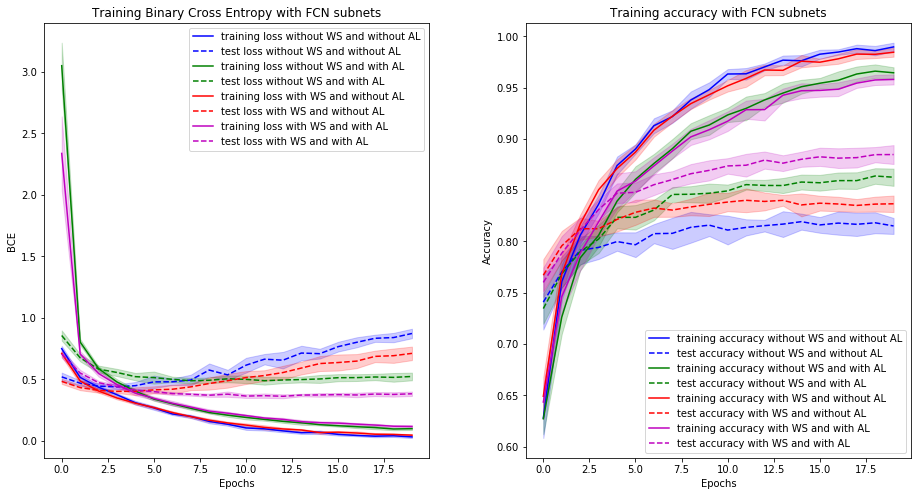

In [17]:
plots_results(round_results_FCN,'FCN')

In [27]:
means_FCN = np.array(round_results_FCN).mean(axis= 0)
means_FCN[:,3,19] #test_accuracy

array([0.8224, 0.8523, 0.8366, 0.8764])

#### Subnet : CNN

In [13]:
CNN()

CNN(
  (conv_net): Sequential(
    (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1))
    (1): LeakyReLU(negative_slope=0.01)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Dropout(p=0.2)
    (4): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
    (5): LeakyReLU(negative_slope=0.01)
    (6): Dropout(p=0.2)
  )
  (fc_net): ModuleList(
    (0): Sequential(
      (0): Linear(in_features=256, out_features=64, bias=True)
      (1): LeakyReLU(negative_slope=0.01)
      (2): Dropout(p=0.2)
    )
  )
  (output): Linear(in_features=64, out_features=10, bias=True)
)

In [ ]:
round_results_CNN = compute_results('CNN')

Model for weight_sharing = False and aux loss = False on round 0 with subnet CNN
At epoch 1 the training loss is 0.7042109254002571
At epoch 1 the training accuracy is 0.598
epoch 1/20
The test loss is 0.6769229769706726
The test accuracy is 0.544
At epoch 2 the training loss is 0.611661941818893
At epoch 2 the training accuracy is 0.685
epoch 2/20
The test loss is 0.5547940731048584
The test accuracy is 0.76
At epoch 3 the training loss is 0.543155139349401
At epoch 3 the training accuracy is 0.739
epoch 3/20
The test loss is 0.46106773614883423
The test accuracy is 0.797
At epoch 4 the training loss is 0.5034811272472143
At epoch 4 the training accuracy is 0.765
epoch 4/20
The test loss is 0.4242996573448181
The test accuracy is 0.811
At epoch 5 the training loss is 0.4581423942372203
At epoch 5 the training accuracy is 0.777
epoch 5/20
The test loss is 0.44215816259384155
The test accuracy is 0.801
At epoch 6 the training loss is 0.43105598907917736
At epoch 6 the training accuracy 

At epoch 8 the training loss is 0.35042380205821244
At epoch 8 the training accuracy is 0.857
epoch 8/20
The test loss is 0.32595986127853394
The test accuracy is 0.853
At epoch 9 the training loss is 0.31851838608272376
At epoch 9 the training accuracy is 0.859
epoch 9/20
The test loss is 0.29573577642440796
The test accuracy is 0.856
At epoch 10 the training loss is 0.31182741618249565
At epoch 10 the training accuracy is 0.872
epoch 10/20
The test loss is 0.30120036005973816
The test accuracy is 0.87
At epoch 11 the training loss is 0.31235031503252686
At epoch 11 the training accuracy is 0.858
epoch 11/20
The test loss is 0.30151230096817017
The test accuracy is 0.862
At epoch 12 the training loss is 0.28353300363291056
At epoch 12 the training accuracy is 0.879
epoch 12/20
The test loss is 0.2947929799556732
The test accuracy is 0.874
At epoch 13 the training loss is 0.2803403842728585
At epoch 13 the training accuracy is 0.873
epoch 13/20
The test loss is 0.28708747029304504
The 

In [ ]:
plots_results(round_results_CNN, 'CNN')

In [ ]:
means_CNN = np.array(round_results_CNN).mean(axis= 0)
means_CNN[:,3,19] #test_accuracy